### Preditor-Prey models
Let $y$ be the cat population and $x$ the mice population. The the dynamics of the cat-mice population are described by the Lotka-Volterra equations
$$
\begin{aligned}
\frac{\mathrm{d} x}{\mathrm{~d} t} &=\underbrace{k_{x} x(t)}_{(1)}-\underbrace{k_{y, x} x(t) y(t)}_{(2)}, \\
\frac{\mathrm{d} y}{\mathrm{~d} t} &=-\underbrace{k_{y} y(t)}_{(3)}+\underbrace{k_{x, y} y(t) x(t)}_{(4)}
\end{aligned}
$$
1 and 3 describe the growth/death of the respective populations while 2 and 4 the interactioons between the two populations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from population_dynamics import ExplicitEuler, Integrator, RK2
from scipy.integrate import solve_ivp

In [2]:
class LotkaVolterra:
    """This class defines the Lotka--Voltera prey-predator
    system. There are 4 parameters in this class which 
    define the evoluion of the system.

    Attributes:
        k_x     reproduction rate of the mice
        k_yx    death rate of mice when the meet cats
        k_y     death rate of cats
        k_xy     reproduction rate of the cats when they meet cats
    """
    def __init__(self,k_x,k_yx,k_y,k_xy):
        self.k_x = k_x
        self.k_yx = k_yx
        self.k_y = k_y
        self.k_xy = k_xy

    def __call__(self,y,t):
        ynew = np.zeros(len(y))
        ynew[0] = self.k_x*y[0]-self.k_yx *y[0]*y[1]
        ynew[1] = -self.k_y*y[1]+self.k_xy *y[0]*y[1]

        return ynew

The Euler method might propagate numerical errors

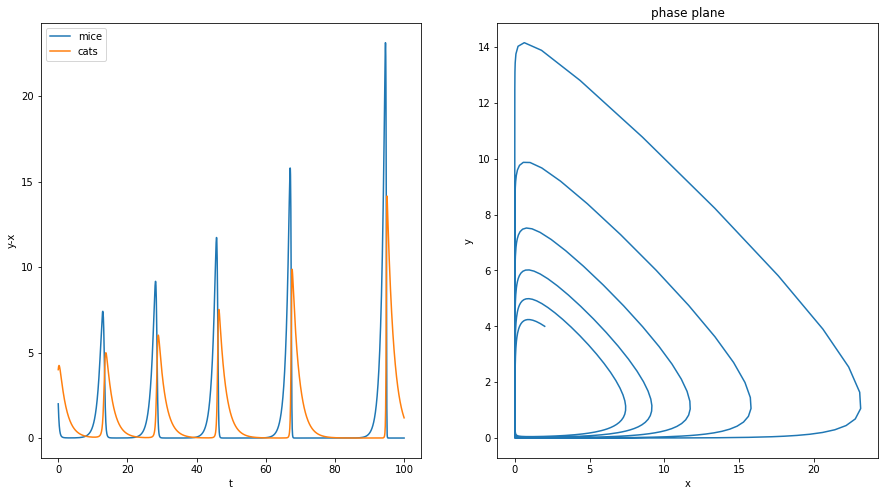

In [3]:
s0 = np.array([2, 4])
tmin = 0
tmax = 100

#LotaVoltera with k_x = 1, k_yx = 1, k_y = 0.5,k_xy = 0.5 
eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),s0,tmin,tmax,2000)
dynamics = eul.integrate()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
t = eul.getIntegrationTime()
ax1.plot(t,dynamics[:,0], label = 'mice')
ax1.plot(t,dynamics[:,1],label = 'cats')
ax1.set_ylabel('y-x')
ax1.set_xlabel('t')
ax1.legend()
ax2.plot(dynamics[:,0], dynamics[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y")
ax2.set_xlabel('x')
plt.show()

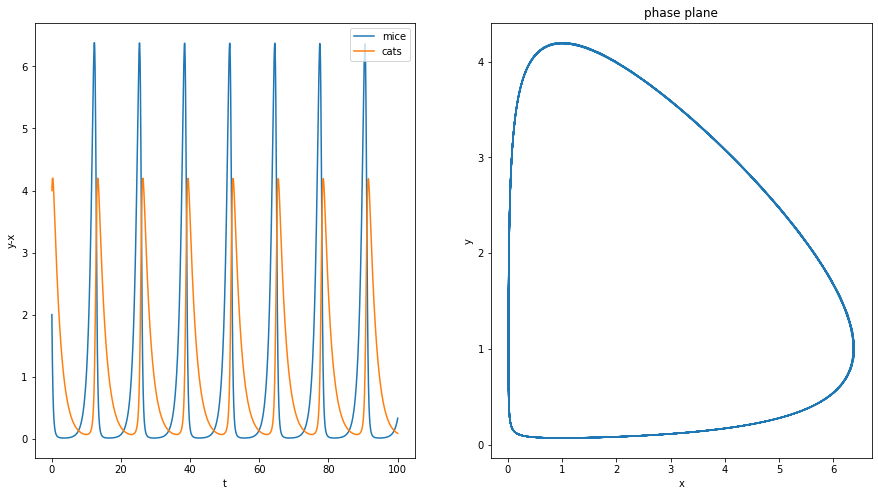

In [4]:
#Try with a different scheme
#LotaVoltera with k_x = 1, k_yx = 1, k_y = 0.5,k_xy = 0.5 
eul = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),s0,tmin,tmax,2000)
dynamics = eul.integrate()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
t = eul.getIntegrationTime()
ax1.plot(t,dynamics[:,0], label = 'mice')
ax1.plot(t,dynamics[:,1],label = 'cats')
ax1.set_ylabel('y-x')
ax1.set_xlabel('t')
ax1.legend()
ax2.plot(dynamics[:,0], dynamics[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y")
ax2.set_xlabel('x')
plt.show()

### SIR model for disease dynamics

If $S$ is the number of people succeptible to be infected in a community, $I$ is the number of the infected and $R$ the number of the recovered people then the dynamics of an epidemic are modeled by the system of equations

$$
\begin{aligned}
\frac{d S}{d t} &=-\frac{\alpha S I}{N} -v S -d S +d N \\
\frac{d I}{d t} &=\frac{\alpha S I}{N}-(r+d) I \\
\frac{d R}{d t} &=r I-d R+v S
\end{aligned}
$$

where $b$ is the birth rate $\alpha$ is the infection rate, $r$ is the recovery rate, $v$ is the vaccination rate $d$ is the death rate and $N=S+I+R$ is the total population.

In [5]:
class SIR:
    """This class defines the SIR model
    system. There are 5 parameters in this class which 
    define the evoluion of the system.

    Attributes:
        b=d     birth rate = death rate
        a    infection rate
        r     recovery rate
        v     vaccination rate
        d     death rate
    """
    def __init__(self,b,a,r,v,d):
        self.a = a
        #self.b = b
        self.r = r
        self.v = v
        self.d = d

    def __call__(self,y,t):
        n = y.sum()
        s,i,r = y
        ynew = np.zeros(len(y))
        ynew[0] = (-((self.a * s * i) / n) - self.v * s - self.d * s + (self.d * n) )
        ynew[1] = (((self.a * s * i) / n) - (self.r + self.d)*i)
        ynew[2] = ((self.r * i)- (self.d * r)+ (self.v * s))
        
        return ynew

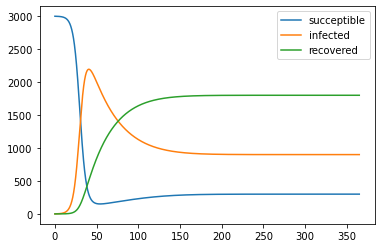

The population (succeptible, infected, recovered) after 1 year without vaccination: [0.10000008 0.2999998  0.60000012]


In [6]:
s0 = np.array([2999, 1, 0])
tmin = 0
tmax = 365


eul = Integrator(ExplicitEuler(SIR(b=0.01,a=0.3,r=0.02,v=0,d=0.01)),s0,tmin,tmax,2000)
dynamics1 = eul.integrate()

t = eul.getIntegrationTime()
plt.plot(t,dynamics1[:,0], label = 'succeptible')
plt.plot(t,dynamics1[:,1], label = 'infected')
plt.plot(t,dynamics1[:,2], label = 'recovered')
plt.legend()
plt.show()
print("The population (succeptible, infected, recovered) after 1 year without vaccination:",
      dynamics1[-1,:]/dynamics1[-1,:].sum(axis=0))

If we want to achieve 85% vaccinations in 1 year then the daily vaccination rate = 85/100/365. But then the equilibrium state remains the same 10% succeptible 30% infected and 60% recovered.

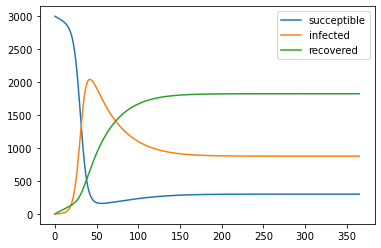

The population (succeptible, infected, recovered) after 1 year with vaccination: [0.09999995 0.29223744 0.6077626 ]


In [7]:
s0 = np.array([2999, 1, 0])
tmin = 0
tmax = 365


eul = Integrator(ExplicitEuler(SIR(b=0.01,a=0.3,r=0.02,v=(85/100)/(365/1),d=0.01)),s0,tmin,tmax,2000)
dynamics2 = eul.integrate()
t = eul.getIntegrationTime()
plt.plot(t,dynamics2[:,0], label = 'succeptible')
plt.plot(t,dynamics2[:,1], label = 'infected')
plt.plot(t,dynamics2[:,2], label = 'recovered')
plt.legend()
plt.show()
print("The population (succeptible, infected, recovered) after 1 year with vaccination:",
      dynamics2[-1,:]/dynamics2[-1,:].sum(axis=0))

#### Finding optimal vaccination rate in order to change the equilibrium

The cost of the infected people and the vaccination costs for each vaccination rate scenario is calculated

In [8]:
v = [(85/100)/(365/x) for x in np.arange(1,20)]
VACCINE_COST = 40
DAILY_HEALTH_COST = 10
res = np.zeros((len(v),3))
cost = np.zeros(len(v))

for i in range(len(v)):
    
    eul = Integrator(ExplicitEuler(SIR(b=0.01,a=0.3,r=0.02,v=v[i],d=0.01)),s0,tmin,tmax,2000)
    dynamics = eul.integrate()
    res[i,:] = dynamics[-1,:]/dynamics[-1,:].sum(axis=0)
    cost[i] = (dynamics[:,[0,2]].sum(axis=1)*v[i]*VACCINE_COST).sum() + (dynamics[:,1]*DAILY_HEALTH_COST).sum()

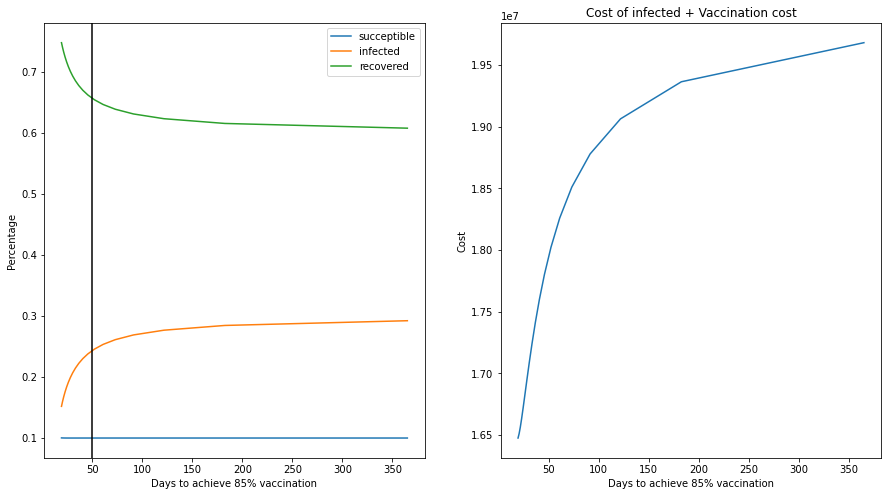

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
freq = [(365/x) for x in np.arange(1,20)]


ax1.plot(freq,res[:,0], label = 'succeptible')
ax1.plot(freq,res[:,1], label = 'infected')
ax1.plot(freq,res[:,2], label = 'recovered')
ax1.axvline(50, color='black')
ax1.legend()
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Days to achieve 85% vaccination')

ax2.plot(freq, cost)
ax2.set_title("Cost of infected + Vaccination cost")
ax2.set_ylabel("Cost")
ax2.set_xlabel('Days to achieve 85% vaccination')
plt.show()


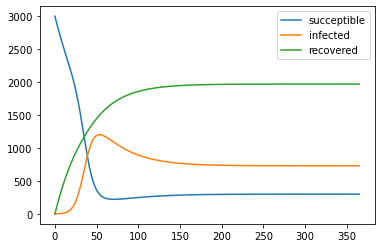

The population (succeptible, infected, recovered) after 1 year with vaccination: [0.09999429 0.2433462  0.65665951]


In [14]:
eul = Integrator(ExplicitEuler(SIR(b=0.01,a=0.3,r=0.02,v=(85/100)/(50),d=0.01)),s0,tmin,tmax,2000)
dynamics2 = eul.integrate()
t = eul.getIntegrationTime()
plt.plot(t,dynamics2[:,0], label = 'succeptible')
plt.plot(t,dynamics2[:,1], label = 'infected')
plt.plot(t,dynamics2[:,2], label = 'recovered')
plt.legend()
plt.show()
print("The population (succeptible, infected, recovered) after 1 year with vaccination:",
      dynamics2[-1,:]/dynamics2[-1,:].sum(axis=0))

#### TODO Claculate costs

### Solving with scipy solvers

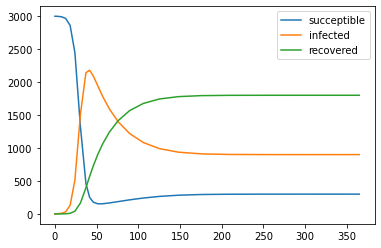

The population (succeptible, infected, recovered) after 1 year without vaccination: [0.10000377 0.29999614 0.60000009]


In [15]:
sol = solve_ivp(lambda t,y: SIR(b=0.01,a=0.3,r=0.02,v=0,d=0.01)(y,t),t_span=[tmin,tmax],y0=s0)

t = sol.t
plt.plot(t,sol.y[0], label = 'succeptible')
plt.plot(t,sol.y[1], label = 'infected')
plt.plot(t,sol.y[2], label = 'recovered')
plt.legend()
plt.show()
print("The population (succeptible, infected, recovered) after 1 year without vaccination:",
      sol.y[:,-1]/sol.y[:,-1].sum(axis=0))

After 2 year the endemic has reached a stable point, we can now calculate the total costs for the 2 year period and the daily costs after the two year period assuming that we vaccinate 85% of the new borns every two years